In [16]:
!python -m pip install -U matplotlib
!pip install -U seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.2 MB/s eta 0:00:004.2 MB/s eta 0:00:01


In [25]:
import pandas as pd
import torch
import re
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [26]:
def parse_size(size):
    size = str(size).strip().lower()

    # 🧹 extrai o primeiro número da string
    match = re.search(r"[\d\.]+", size)
    if not match:
        return None  # caso não encontre número

    num = float(match.group())

    # 🔠 converte baseado em sufixo
    if 'b' in size:
        return num * 1e9
    elif 'm' in size:
        return num * 1e6
    else:
        return num

df = pd.read_csv("model_slm_disponiveis.csv",sep=',')
df["Size_num"] = df["Size"].apply(parse_size)
df

,Model,Size,Input size (tokens),Output size (tokens),Num Layers,Num Heads,Hidden Size,License,Organization,Context Window,Release Year,Fonte,Size_num
0,Cogito 3B,3B,128000,4000,26,32,4096,Apache 2.0,Deep Cogito,128000,2025,https://github.com/deep-cogito,3.000000e+09
1,Cogito 8B,8B,128000,4000,32,32,4096,Apache 2.0,Deep Cogito,128000,2025,https://github.com/deep-cogito,8.000000e+09
2,Cogito 14B,14B,128000,4000,40,40,5120,Apache 2.0,Deep Cogito,128000,2025,https://github.com/deep-cogito,1.400000e+10
3,Cogito 32B,32B,128000,4000,60,52,6656,Apache 2.0,Deep Cogito,128000,2025,https://github.com/deep-cogito,3.200000e+10
4,Cogito 70B,70B,128000,4000,80,64,8192,Apache 2.0,Deep Cogito,128000,2025,https://github.com/deep-cogito,7.000000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,SmolLM 360M,0.36B,2048,2048,24,16,1024,Apache 2.0,Hugging Face,2048,2024,https://huggingface.co/blog/smolLM,3.600000e+08
57,SmolLM2 135M,0.135B,8192,8192,12,10,768,Apache 2.0,Hugging Face,8192,2024,https://huggingface.co/HuggingFaceTB,1.350000e+08
58,SmolLM2 360M,0.36B,8192,8192,24,16,1024,Apache 2.0,Hugging Face,8192,2024,https://huggingface.co/HuggingFaceTB,3.600000e+08
59,SmolLM2 1.7B,1.7B,8192,8192,24,32,2048,Apache 2.0,Hugging Face,8192,2024,https://arxiv.org/abs/2502.02737,1.700000e+09


In [22]:
df.dtypes

Model                    object
Size                     object
Input size (tokens)       int64
Output size (tokens)      int64
Num Layers                int64
Num Heads                object
Hidden Size               int64
License                  object
Organization             object
Context Window            int64
Release Year              int64
Fonte                    object
Size_num                float64
dtype: object

## Dicionário de Dados — Modelos SLM Disponíveis

| Coluna                   | Tipo      | Descrição                                                                                                                                                                                  |
| :----------------------- | :-------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Model**                | `object`  | Nome do modelo de linguagem. Exemplo: `Llama 3.1 8B`, `Mistral 7B`, `Gemma 2B`. Representa a identificação pública da arquitetura.                                                         |
| **Size**                 | `object`  | Tamanho nominal do modelo, geralmente expresso em bilhões (`B`) ou milhões (`M`) de parâmetros. Exemplo: `7B`, `1.3B`.                                                                     |
| **Input size (tokens)**  | `int64`   | Número máximo de *tokens* aceitos como entrada pelo modelo (janela de contexto). Define o quanto de texto o modelo pode processar de uma vez.                                              |
| **Output size (tokens)** | `int64`   | Número máximo de *tokens* que o modelo pode gerar na saída. Está relacionado ao comprimento máximo da resposta.                                                                            |
| **Num Layers**           | `int64`   | Quantidade de camadas (ou blocos) da arquitetura de rede neural Transformer. Um número maior tende a indicar maior profundidade e capacidade de representação.                             |
| **Num Heads**            | `object`  | Número de *attention heads* (cabeças de atenção) utilizados em cada camada. Pode aparecer como texto se o valor não estiver padronizado (ex: “32 heads” ou “32”).                          |
| **Hidden Size**          | `int64`   | Dimensão do vetor interno usado em cada camada da rede (tamanho do espaço latente). Indica a largura do modelo.                                                                            |
| **License**              | `object`  | Tipo de licença de uso do modelo (ex: `Apache 2.0`, `MIT`, `OpenRAIL-M`). Define as permissões e restrições de uso e distribuição.                                                         |
| **Organization**         | `object`  | Entidade ou empresa responsável pelo desenvolvimento ou liberação do modelo. Exemplo: `Meta`, `Mistral`, `Google`, `Stability AI`.                                                         |
| **Context Window**       | `int64`   | Quantidade total de *tokens* que o modelo pode considerar no contexto completo (entrada + saída). Está relacionado à capacidade de memória de curto prazo.                                 |
| **Release Year**         | `int64`   | Ano de lançamento ou publicação oficial do modelo. Útil para análise temporal de evolução tecnológica.                                                                                     |
| **Fonte**                | `object`  | Origem ou referência do dado (ex: repositório, paper, site do modelo). Permite rastrear a proveniência da informação.                                                                      |
| **Size_num**             | `float64` | Versão numérica padronizada do tamanho do modelo, convertida para o total de parâmetros em unidades absolutas (por exemplo, `7B` → `7.0e9`). Usada para análises quantitativas e gráficos. |


## Exploração dos dados do Modelos

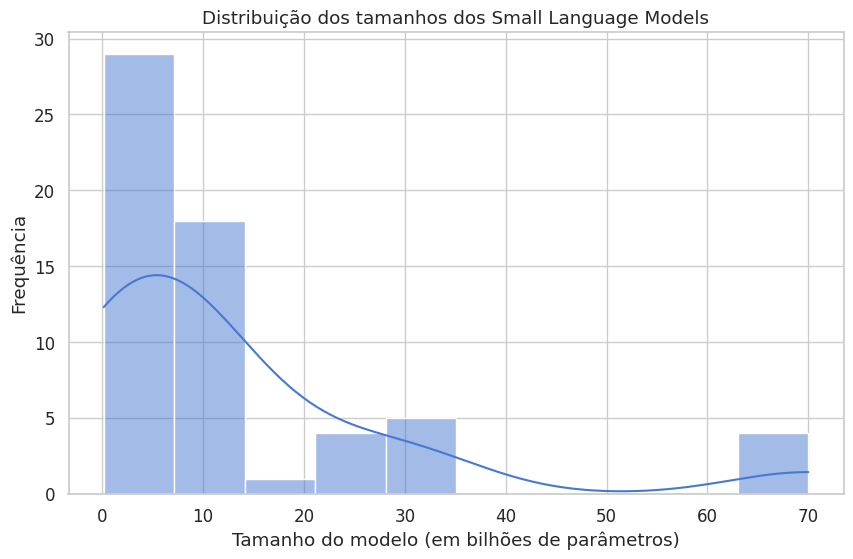

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Size_num"] / 1e9, bins=10, kde=True)
plt.xlabel("Tamanho do modelo (em bilhões de parâmetros)")
plt.ylabel("Frequência")
plt.title("Distribuição dos tamanhos dos Small Language Models")
plt.show()

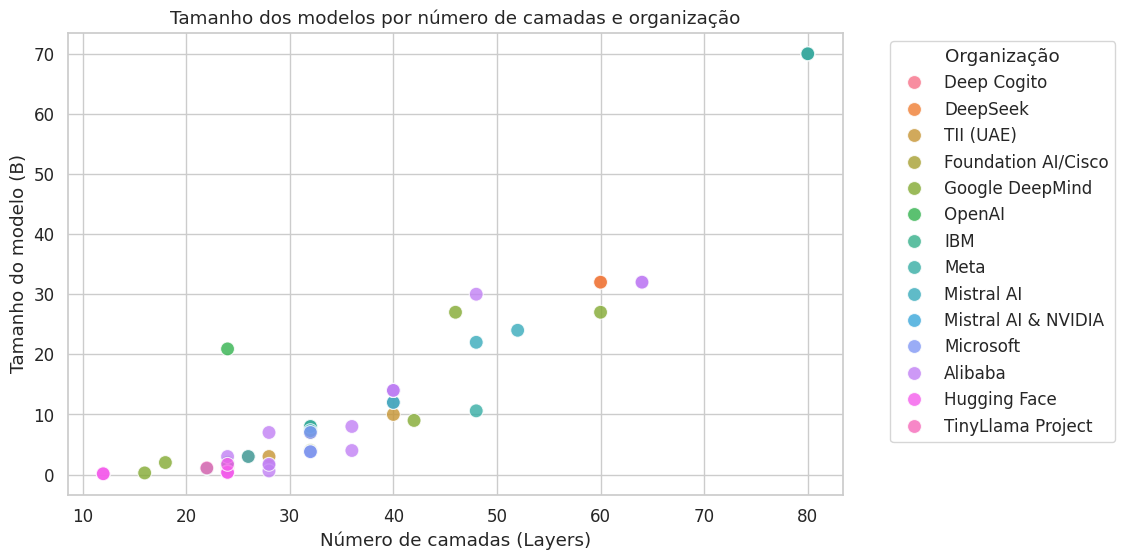

In [38]:
# ====== 2️⃣ RELAÇÃO ENTRE TAMANHO E NÚMERO DE LAYERS ======
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Num Layers"], y=df["Size_num"] / 1e9, hue=df["Organization"], s=100, alpha=0.8)
plt.xlabel("Número de camadas (Layers)")
plt.ylabel("Tamanho do modelo (B)")
plt.title("Tamanho dos modelos por número de camadas e organização")
plt.legend(title="Organização", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

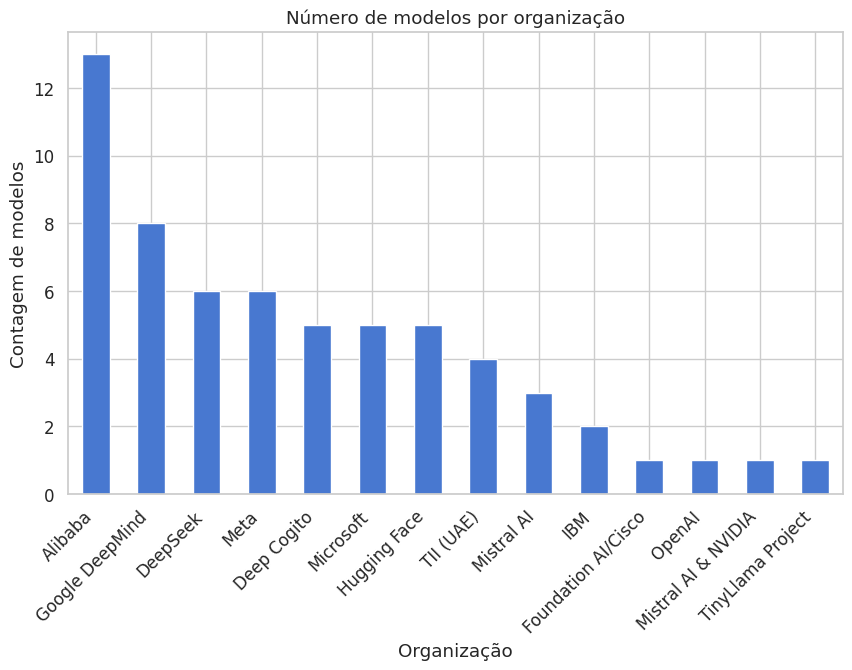

In [29]:
# ====== 3️⃣ CONTAGEM DE MODELOS POR ORGANIZAÇÃO ======
plt.figure(figsize=(10, 6))
df["Organization"].value_counts().plot(kind="bar")
plt.title("Número de modelos por organização")
plt.ylabel("Contagem de modelos")
plt.xlabel("Organização")
plt.xticks(rotation=45, ha="right")
plt.show()

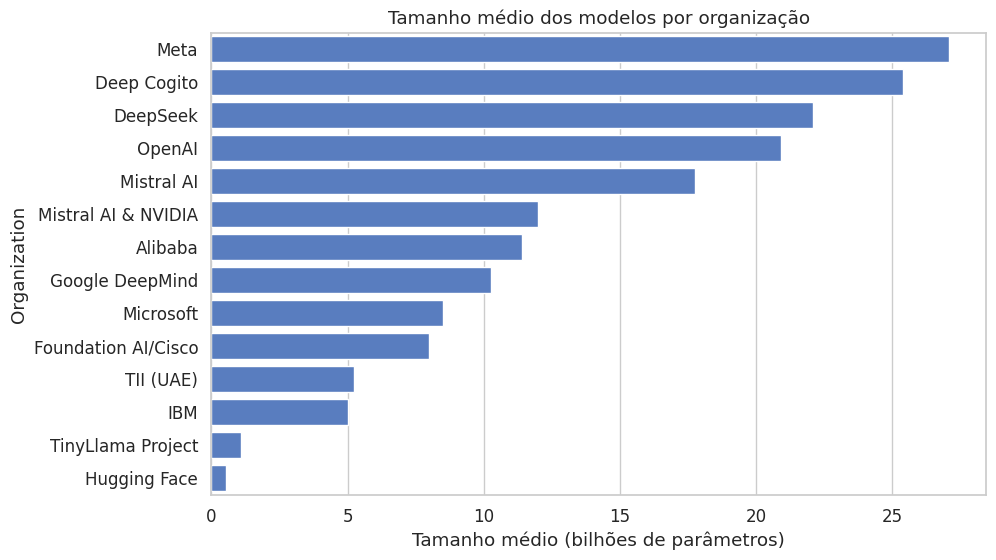

In [30]:
# ====== 4️⃣ TAMANHO MÉDIO POR ORGANIZAÇÃO ======
plt.figure(figsize=(10, 6))
org_mean = df.groupby("Organization")["Size_num"].mean().sort_values(ascending=False) / 1e9
sns.barplot(x=org_mean.values, y=org_mean.index)
plt.xlabel("Tamanho médio (bilhões de parâmetros)")
plt.title("Tamanho médio dos modelos por organização")
plt.show()

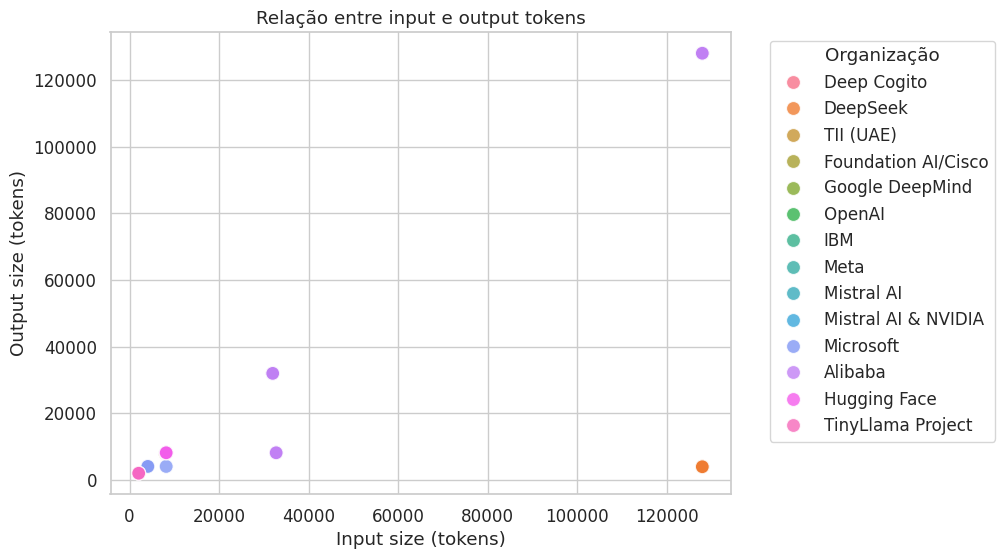

In [40]:
# ====== 5️⃣ RELAÇÃO ENTRE INPUT E OUTPUT TOKENS ======
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Input size (tokens)", y="Output size (tokens)", data=df, hue="Organization", s=100, alpha=0.8)
plt.title("Relação entre input e output tokens")
plt.legend(title="Organização", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

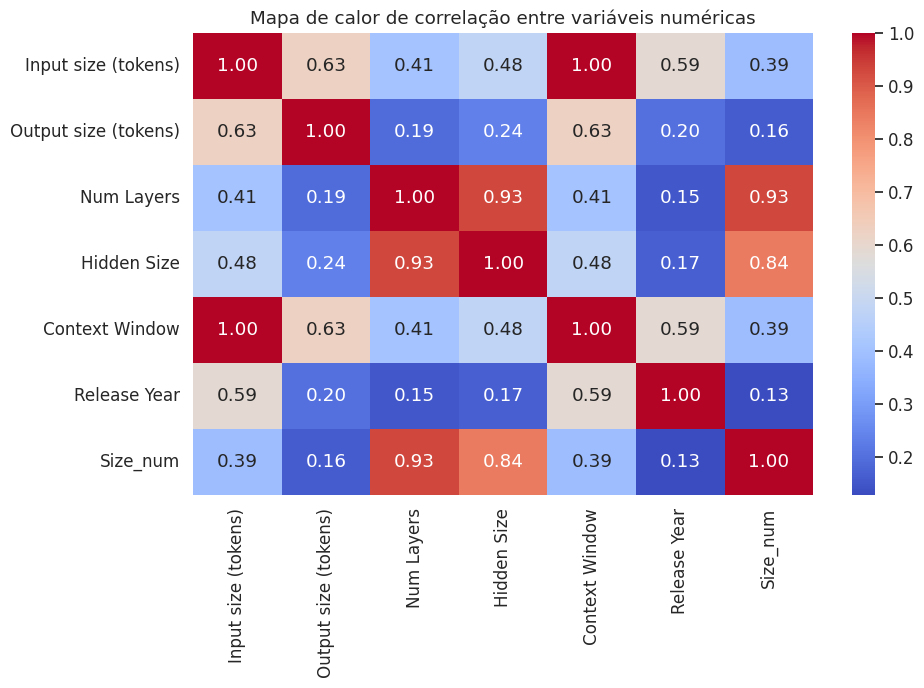

In [32]:
# ====== 6️⃣ HEATMAP DE CORRELAÇÃO ======
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlação entre variáveis numéricas")
plt.show()
